In [29]:
# The aim is to map our policy reform outcomes (as measured by magnitude scores) to the geographical data of each province
# So that the scores data can be visualized on a map of China

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas


# 1. Merge our outcomes data with the geographical data of latitude/longitude

dbf = geopandas.read_file("gadm36_CHN_1.dbf").loc[:,["NAME_1", "geometry"]]
df = pd.read_excel("scores.xlsx", index_col = 0)
m = pd.merge(dbf, df, how="outer", left_on = "NAME_1", right_index=True).set_index("NAME_1")


# 2. Mapping the Data

%matplotlib notebook

var = ["ts_all", "as_all", "ts_sel", "as_sel", "ts_int", "as_int", "num_res", "num_len", "num_ls", "num_li"]
col = ["RdPu", "PuRd", "BuGn", "GnBu", "OrRd", "PuBu", "BuPu", "Greens", "Purples", "Blues", "Reds"]
title = ["Total Scores", "Average Scores", "Total Selection Scores", "Average Selection Scores", "Total Integration Scores", 
        "Average Integration Scores", "Number of More Restrictive Measures", "Number of More Lenient Measures", 
        "Number of More Lenient Selection Measures", "Number of More Lenient Integration Measures"]

def mapping(var, title, color):
    ax = m.plot(figsize = (8, 6), color = "grey", edgecolor = "#B2BABB") #Provinces without data are marked as grey
    m.dropna().plot(ax = ax, column = var, cmap = color, legend = True)
    
    ax.tick_params(bottom = False, labelbottom = False, left = False, labelleft = False, top = False, right = False)    
    
    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.title(title + ", 2014 China's Hukou Reform", fontsize = 10)
    plt.show()


<IPython.core.display.Javascript object>


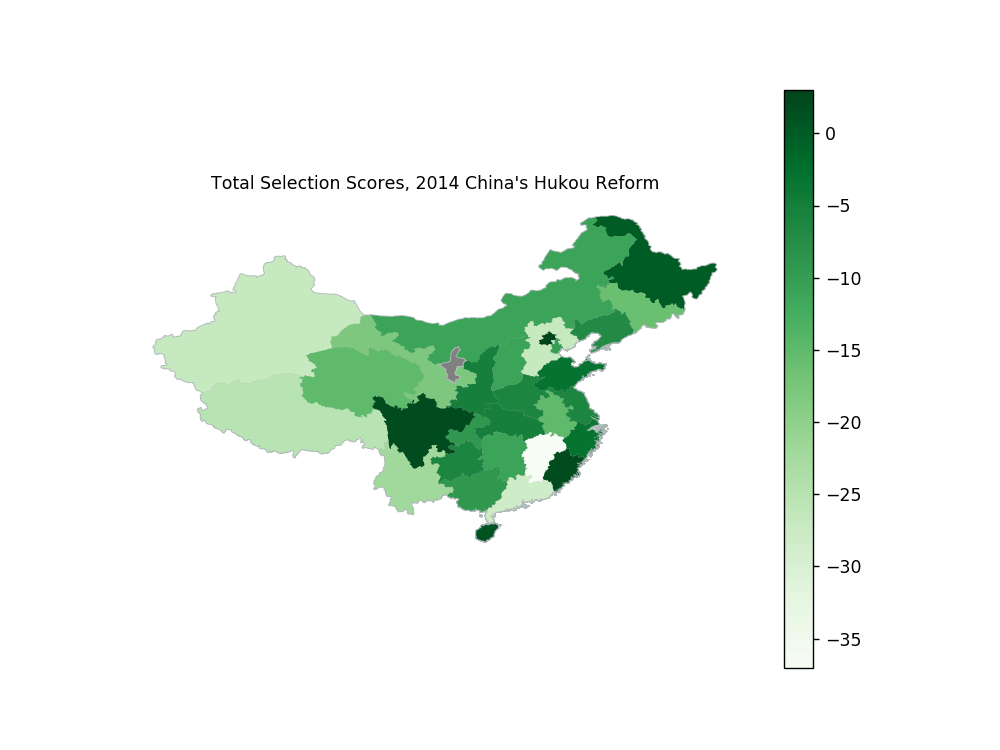

In [12]:
mapping(var[2], title[2], col[7]) # can pick any combination of score type and color

<IPython.core.display.Javascript object>


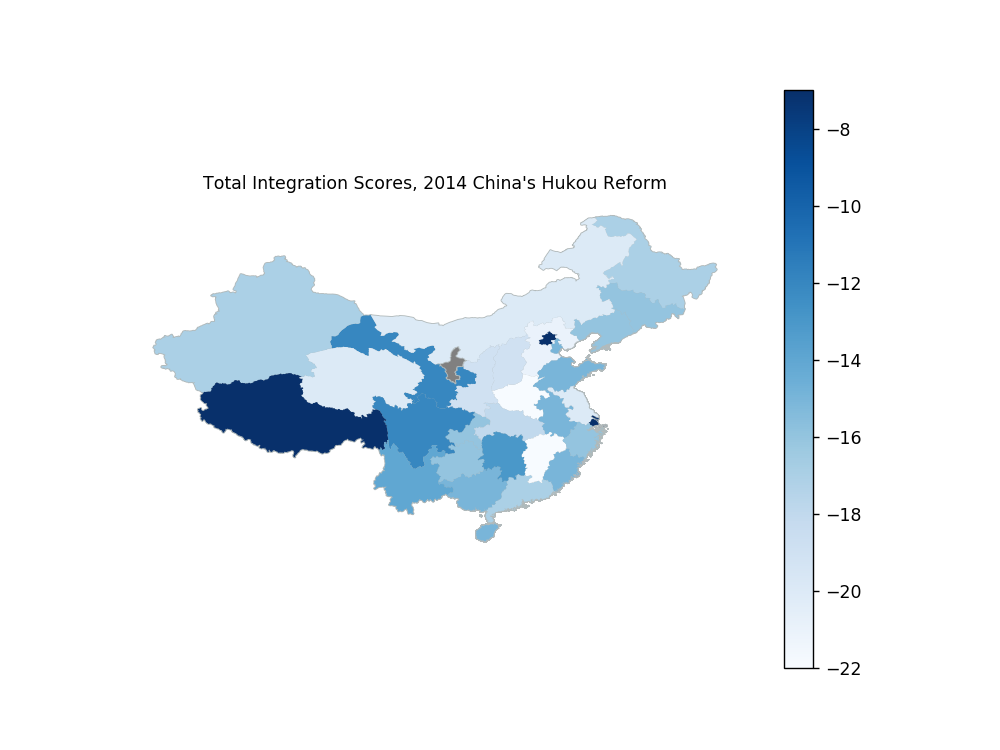

In [18]:
mapping(var[4], title[4], col[9])

<IPython.core.display.Javascript object>


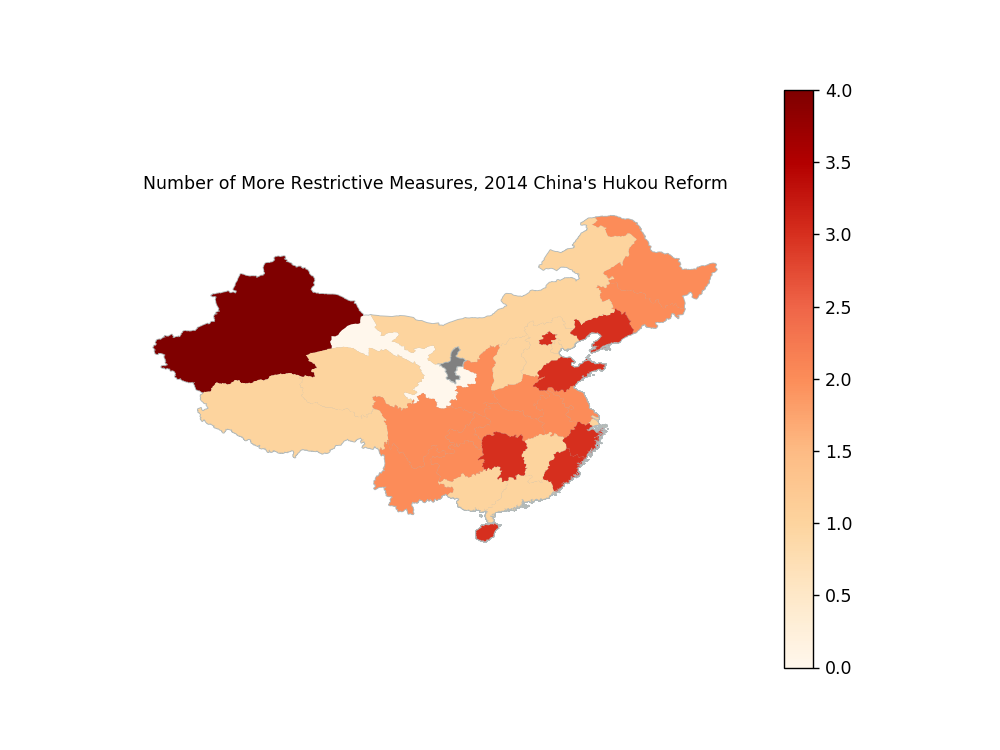

In [21]:
mapping(var[6], title[6], col[4])

<IPython.core.display.Javascript object>


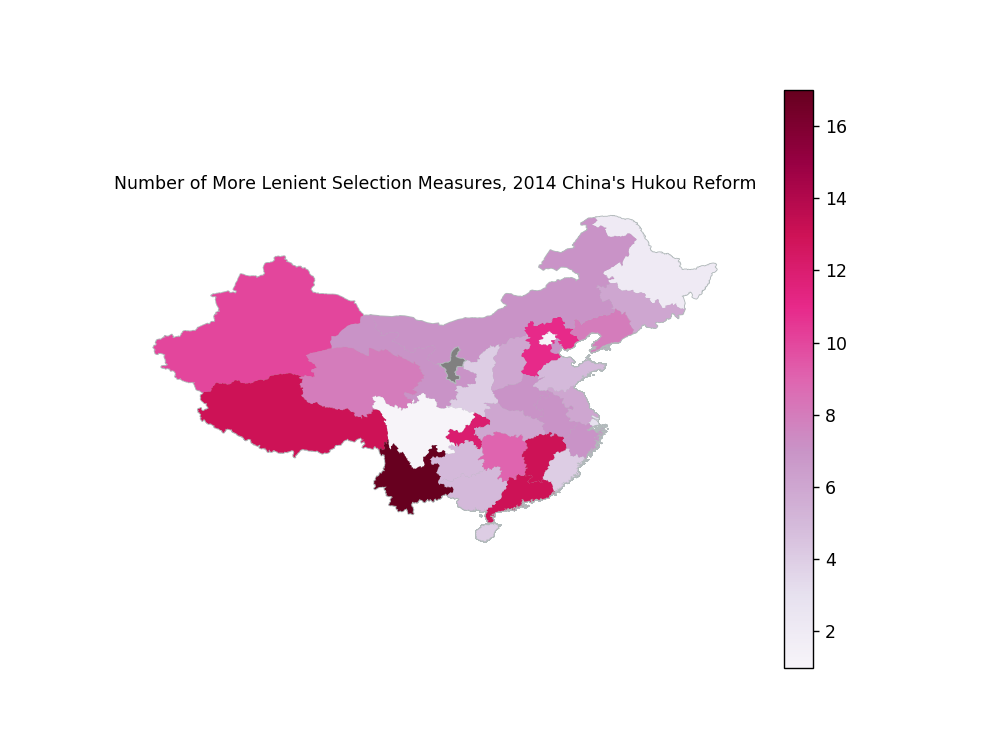

In [26]:
mapping(var[8], title[8], col[1])